### 不可运行，因为里面的很多变量都乱了

### 几个魔法函数

In [ ]:
#1） 如何看“这是什么”：
b='123,2314'
b?

#2）如何看源代码：
def split (series):
    y,m=series.split(',')
    return "%i年%i月"%(y,m)
split??

#3）跑其它的py脚本，注意文件路径，以及是%
%run temp.py


### 数组的切片 - 视图

In [454]:
array=np.array(range(1,10)).reshape(3,3)

b=array[:1,]
b[:]=np.array([4,5,6]) #修改切片，array也会跟着变的
#b[:]=np.array(['a','b','c']) 这是不行的，数据类型不同
print (array)

b=np.array([1,2,3]) #这个不会对原始数组产生影响，也就是说，只有对‘切片’修改的时候，才会改变原数组
print (array)

b_copy=b.copy() #这个时候修改，就没有关系了

[[4 5 6]
 [4 5 6]
 [7 8 9]]
[[4 5 6]
 [4 5 6]
 [7 8 9]]


### 将数据存到指定的位置，更高效

In [36]:
empty = np.empty(10)
x=np.arange(5)
np.multiply(x,2,out=empty[::2])

array([0., 2., 4., 6., 8.])

### 两个不同输入数组所有元素对的函数运算结果

In [39]:
np.add.outer(x,x)

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8]])

### K个最邻值

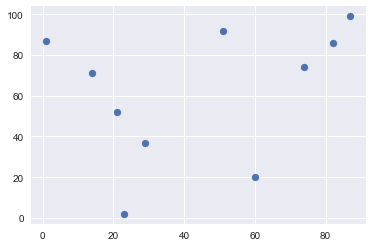

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
%matplotlib inline

rand=np.random.RandomState(42)
X=rand.randint(100,size=(10,2))

plt.scatter(X[:,0],X[:,1],cmap='viridis')

In [461]:
# 通过的numpy的广播就一步实现了
np.sum((X[:,np.newaxis,:]-X[np.newaxis,:,:])**2,axis=-1)
np.argsort(np.sum((X[:,np.newaxis,:]-X[np.newaxis,:,:])**2,axis=-1))

array([[0, 4, 3, 5, 1, 7, 8, 9, 2, 6],
       [1, 7, 8, 9, 0, 4, 2, 6, 3, 5],
       [2, 9, 6, 7, 4, 1, 3, 0, 5, 8],
       [3, 5, 4, 0, 2, 1, 7, 9, 8, 6],
       [4, 3, 5, 0, 2, 7, 9, 1, 8, 6],
       [5, 3, 4, 0, 1, 7, 2, 9, 8, 6],
       [6, 9, 2, 7, 1, 8, 4, 0, 3, 5],
       [7, 9, 1, 8, 0, 6, 2, 4, 3, 5],
       [8, 1, 7, 0, 9, 4, 3, 5, 6, 2],
       [9, 7, 2, 6, 1, 8, 4, 0, 3, 5]])

In [ ]:
#有k个值的时候，用的是np.argpartition
k=np.argpartition(np.sum((X[:,np.newaxis]-X[np.newaxis,:])**2,axis=-1),3)
k

In [463]:
 X[:,np.newaxis].shape

(10, 1, 2)

In [467]:
print(t+t2)
np.sum(t+t2,axis=-1) #这里就实现降维了

[[[12  9]
  [14 15]
  [18 15]]

 [[ 5  2]
  [ 7  8]
  [11  8]]

 [[10  8]
  [12 14]
  [16 14]]]


array([[21, 29, 33],
       [ 7, 15, 19],
       [18, 26, 30]])

(51, 51) (92, 92)
(74, 51) (74, 92)
(82, 51) (86, 92)
(14, 14) (71, 71)
(21, 14) (52, 71)
(1, 14) (87, 71)
(60, 60) (20, 20)
(29, 60) (37, 20)
(23, 60) (2, 20)
(82, 82) (86, 86)
(74, 82) (74, 86)
(87, 82) (99, 86)
(82, 74) (86, 74)
(74, 74) (74, 74)
(87, 74) (99, 74)
(82, 87) (86, 99)
(74, 87) (74, 99)
(87, 87) (99, 99)
(29, 23) (37, 2)
(23, 23) (2, 2)
(60, 23) (20, 2)
(21, 21) (52, 52)
(29, 21) (37, 52)
(14, 21) (71, 52)
(1, 1) (87, 87)
(14, 1) (71, 87)
(21, 1) (52, 87)
(29, 29) (37, 37)
(21, 29) (52, 37)
(60, 29) (20, 37)


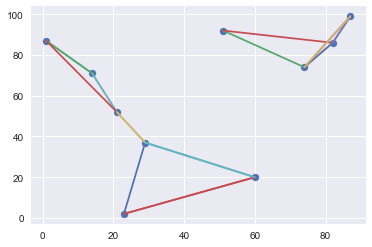

In [468]:
plt.scatter(X[:,0],X[:,1])
for i in range(X.shape[0]):
    for j in k[i,:3]:
        plt.plot(*zip(X[j],X[i]))
#        print (i,j)
        print(*zip(X[j],X[i]))
#https://www.cnblogs.com/waltsmith/p/8029539.html

### 关于 “显性索引” 和 “隐性索引” 

In [164]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])

data.loc['a':'c'] #显性的所以，包含最后一项的

a    0.25
b    0.50
c    0.75
dtype: float64

In [171]:
data.iloc[0:2] #隐性的所以，不包含最后一项的

a    0.25
b    0.50
dtype: float64

### item是个什么东东？？

In [178]:
import numpy as np
import pandas as pd 
ser=pd.Series(data=[1,2,3],index=['a','c','b'])
print (ser)
ser.items()

a    1
c    2
b    3
dtype: int64


In [180]:
list(zip(*ser.items()))

[('a', 'c', 'b'), (1, 2, 3)]

### 如果有缺失值的话，做计算会：“传染”，不能用 “ + - * / ”，而需要用函数

In [195]:
A.add(B,fill_value=1)

,A,B,C
0,10.0,26.0,7.0
1,16.0,19.0,7.0
2,5.0,8.0,4.0


In [312]:
len(ser[ser.isnull()]) #使用掩码，然后看其长度，就能知道是不是包含null值了，（pandas对象，因为是二维的，所以用，innull().any()会更有效）

1

In [326]:
ser.fillna('missing',inplace=True)
type(ser[0])

# series是异构的

float

In [332]:
ser.index.name='foo' #给index取名字了
ser

foo
0          1
1          2
2          3
3    missing
4          3
dtype: object

### 层级索引

In [333]:
#这种方式，很垃圾，只能通过for循环才能读取到两个层级的索引
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]

populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]

pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [343]:
#构建multiIndex，方便很多，选取也很方便
index = pd.MultiIndex.from_tuples(index) #当然，生成MultiIndex的方法有很多，实践中去看吧
index

pop=pop.reindex(index)
pop

pop[:,2000]  #注意series对象，通过第二级索引选取的话，前面一定要先切片 ：，否则显示错误
pop["California"]
pop['California',2000]

33871648

In [344]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.458042  0.155396
  2  0.601035  0.583016
b 1  0.721402  0.996896
  2  0.245324  0.925247

In [ ]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

In [348]:
pop.index.names = ['state', 'year']
pop.sort_index()
#pop.sort_values()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### 多级索引的取值，切片

In [346]:
#对于series来说： 

pop[:,2000]  #注意series对象，通过第二级索引选取的话，前面一定要先切片 ：，否则显示错误
pop["California"]
pop['California',2000]


<bound method Series.sort_index of California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64>

In [349]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      58.0  37.6  22.0  38.3  46.0  37.7
     2      41.0  38.3  29.0  35.9  37.0  37.8
2014 1      19.0  38.6  37.0  37.9  20.0  37.1
     2      54.0  37.1  48.0  38.4  11.0  38.3

In [470]:
#对于Dataframe来说： 基本索引是 “列索引” 。
health_data['Guido', 'HR']
health_data['Guido']

type          HR  Temp
year visit            
2013 1      22.0  38.3
     2      29.0  35.9
2014 1      37.0  37.9
     2      48.0  38.4

In [355]:
#用到pd.indexSlice会好很多
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]# 1）是显性索引；2）结构为  df.loc[  [ , ] , [ , ] ] ; 依次为index的两个层级，和column的两个层级

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,58.0,22.0,46.0
2014,1,19.0,37.0,20.0


In [361]:
health_data.loc[idx[:, 2], idx['Bob', :]]

subject      Bob      
type          HR  Temp
year visit            
2013 2      41.0  38.3
2014 2      54.0  37.1

In [365]:
#对index切片，必须要先排序

index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)
    
    
data2=data.sort_index()
data2['a':'b']


<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


char  int
a     1      0.636409
      2      0.798905
b     1      0.999691
      2      0.593868
dtype: float64

### 统计方法 , 知道就行了，用groupby完全可以搞定的

In [375]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      58.0  37.6  22.0  38.3  46.0  37.7
     2      41.0  38.3  29.0  35.9  37.0  37.8
2014 1      19.0  38.6  37.0  37.9  20.0  37.1
     2      54.0  37.1  48.0  38.4  11.0  38.3

In [371]:
health_data.sum(axis=0,level=1)

subject   Bob       Guido         Sue      
type       HR  Temp    HR  Temp    HR  Temp
visit                                      
1        77.0  76.2  59.0  76.2  66.0  74.8
2        95.0  75.4  77.0  74.3  48.0  76.1

In [373]:
health_data.sum(axis=0,level=0)

subject   Bob       Guido         Sue      
type       HR  Temp    HR  Temp    HR  Temp
year                                       
2013     99.0  75.9  51.0  74.2  83.0  75.5
2014     73.0  75.7  85.0  76.3  31.0  75.4

In [376]:
# Following are shell commands to download the data
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57935  100 57917    0     0   1078      0  0:00:53  0:00:01  0:00:52  1078935    0     0  23989      0  0:00:02  0:00:02 --:--:-- 23999
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   835  100   835    0     0    352      0  0:00:02  0:00:02 --:--:--   352
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   872  100   872    0     0    499      0  0:00:01  0:00:01 --:--:--   499


In [474]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')
display(pop.head(), areas.head(), abbrevs.head())

total=pd.merge(abbrevs,areas)
total=pd.merge(total,pop,left_on='abbreviation',right_on='state/region')

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


### merge之后，处理 NaN 是最重要的事情，需要养成习惯

In [412]:
total.isna().any(0)

state            True
area (sq. mi)    True
state/region     True
ages             True
year             True
population       True
dtype: bool

### 掩码和索引的结合，对缺失值赋值，相当重要

In [479]:
total.loc[total['state'].isnull(),'state']='PR'

Series([], Name: state, dtype: object)

### dagaframe.query() 怎么玩

In [478]:
query=total.query(" year==2000&ages=='total' " )
query.head(3)

,state,abbreviation,area (sq. mi),state/region,ages,year,population
28,Alabama,AL,52423,AL,total,2000,4452173.0
68,Alaska,AK,656425,AK,total,2000,627963.0
124,Arizona,AZ,114006,AZ,total,2000,5160586.0


### 将关键的字段set_index()之后，再做除法

In [481]:
total.set_index('state',inplace=True)
total['density']=total['population']/total['area (sq. mi)']

#没事就排排序列
total.sort_values(by='density',ascending=False,inplace=True)

### groupby怎么玩

In [485]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [492]:
for i,j in planets.groupby('method'):
    i
j

,method,number,orbital_period,mass,distance,year
680,Transit Timing Variations,2,160.0000,NaN,2119.0,2011
736,Transit Timing Variations,2,57.0110,NaN,855.0,2012
749,Transit Timing Variations,3,NaN,NaN,NaN,2014
813,Transit Timing Variations,2,22.3395,NaN,339.0,2013


In [500]:
planets.groupby('method')[['distance','mass']].describe()

distance                                     \
                                 count         mean          std      min   
method                                                                      
Astrometry                         2.0    17.875000     4.094148    14.98   
Eclipse Timing Variations          4.0   315.360000   213.203907   130.72   
Imaging                           32.0    67.715937    53.736817     7.69   
Microlensing                      10.0  4144.000000  2076.611556  1760.00   
Orbital Brightness Modulation      2.0  1180.000000     0.000000  1180.00   
Pulsar Timing                      1.0  1200.000000          NaN  1200.00   
Pulsation Timing Variations        0.0          NaN          NaN      NaN   
Radial Velocity                  530.0    51.600208    45.559381     1.35   
Transit                          224.0   599.298080   913.876990    38.00   
Transit Timing Variations          3.0  1104.333333   915.819487   339.00   

                                                                         mass  \
                                     25%       50%        75%      max  count   
method                                                                          
Astrometry                       16.4275    17.875    19.3225    20.77    0.0   
Eclipse Timing Variations       130.7200   315.360   500.0000   500.00    2.0   
Imaging                          22.1450    40.395   132.6975   165.00    0.0   
Microlensing                   2627.5000  3840.000  4747.5000  7720.00    0.0   
Orbital Brightness Modulation  1180.0000  1180.000  1180.0000  1180.00    0.0   
Pulsar Timing                  1200.0000  1200.000  1200.0000  1200.00    0.0   
Pulsation Timing Variations          NaN       NaN        NaN      NaN    0.0   
Radial Velocity                  24.4125    40.445    59.2175   354.00  510.0   
Transit                         200.0000   341.000   650.0000  8500.00    1.0   
Transit Timing Variations       597.0000   855.000  1487.0000  2119.00    0.0   

                                                                           \
                                   mean       std     min      25%    50%   
method                                                                      
Astrometry                          NaN       NaN     NaN      NaN    NaN   
Eclipse Timing Variations      5.125000  1.308148  4.2000  4.66250  5.125   
Imaging                             NaN       NaN     NaN      NaN    NaN   
Microlensing                        NaN       NaN     NaN      NaN    NaN   
Orbital Brightness Modulation       NaN       NaN     NaN      NaN    NaN   
Pulsar Timing                       NaN       NaN     NaN      NaN    NaN   
Pulsation Timing Variations         NaN       NaN     NaN      NaN    NaN   
Radial Velocity                2.630699  3.825883  0.0036  0.22525  1.260   
Transit                        1.470000       NaN  1.4700  1.47000  1.470   
Transit Timing Variations           NaN       NaN     NaN      NaN    NaN   

                                              
                                  75%    max  
method                                        
Astrometry                        NaN    NaN  
Eclipse Timing Variations      5.5875   6.05  
Imaging                           NaN    NaN  
Microlensing                      NaN    NaN  
Orbital Brightness Modulation     NaN    NaN  
Pulsar Timing                     NaN    NaN  
Pulsation Timing Variations       NaN    NaN  
Radial Velocity                3.0000  25.00  
Transit                        1.4700   1.47  
Transit Timing Variations         NaN    NaN

In [504]:
#这个我都看不到 “group的那个字段了”
planets.groupby('method').transform(lambda x:x)

,number,orbital_period,mass,distance,year
0,1,269.300000,7.100,77.40,2006
1,1,874.774000,2.210,56.95,2008
2,1,763.000000,2.600,19.84,2011
3,1,326.030000,19.400,110.62,2007
4,1,516.220000,10.500,119.47,2009
5,1,185.840000,4.800,76.39,2008
6,1,1773.400000,4.640,18.15,2002
7,1,798.500000,NaN,21.41,1996
8,1,993.300000,10.300,73.10,2008
9,2,452.800000,1.990,74.79,2010


In [505]:
#这个方法也很傻逼的
planets.set_index('method').groupby('method').transform(lambda x:x)

,number,orbital_period,mass,distance,year
method,,,,,
Radial Velocity,1,269.300000,7.100,77.40,2006
Radial Velocity,1,874.774000,2.210,56.95,2008
Radial Velocity,1,763.000000,2.600,19.84,2011
Radial Velocity,1,326.030000,19.400,110.62,2007
Radial Velocity,1,516.220000,10.500,119.47,2009
Radial Velocity,1,185.840000,4.800,76.39,2008
Radial Velocity,1,1773.400000,4.640,18.15,2002
Radial Velocity,1,798.500000,NaN,21.41,1996
Radial Velocity,1,993.300000,10.300,73.10,2008


In [508]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])

def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

display(df, df.groupby('key').apply(norm_by_data2))

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


In [509]:
df.groupby('key').apply(norm_by_data2)

,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


In [510]:
titanic=sns.load_dataset('titanic')


In [513]:
titanic.age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [524]:
age=pd.cut(titanic['age'],bins=[0,18,80])
titanic.groupby(['age',age]).sum()  #pivottable也能这么用

survived  pclass  sibsp  parch      fare  adult_male  alone
age   age                                                                  
0.42  (0, 18]        1.0     3.0    0.0    1.0    8.5167         0.0    0.0
      (18, 80]       NaN     NaN    NaN    NaN       NaN         NaN    NaN
0.67  (0, 18]        1.0     2.0    1.0    1.0   14.5000         0.0    0.0
      (18, 80]       NaN     NaN    NaN    NaN       NaN         NaN    NaN
0.75  (0, 18]        2.0     6.0    4.0    2.0   38.5166         0.0    0.0
      (18, 80]       NaN     NaN    NaN    NaN       NaN         NaN    NaN
0.83  (0, 18]        2.0     4.0    1.0    3.0   47.7500         0.0    0.0
      (18, 80]       NaN     NaN    NaN    NaN       NaN         NaN    NaN
0.92  (0, 18]        1.0     1.0    1.0    2.0  151.5500         0.0    0.0
      (18, 80]       NaN     NaN    NaN    NaN       NaN         NaN    NaN
1.00  (0, 18]        5.0    19.0   13.0   11.0  210.0417         0.0    0.0
      (18, 80]       NaN     NaN    NaN    NaN       NaN         NaN    NaN
2.00  (0, 18]        3.0    26.0   21.0   13.0  375.3625         0.0    0.0
      (18, 80]       NaN     NaN    NaN    NaN       NaN         NaN    NaN
3.00  (0, 18]        5.0    15.0   11.0    8.0  154.6917         0.0    0.0
      (18, 80]       NaN     NaN    NaN    NaN       NaN         NaN    NaN
4.00  (0, 18]        7.0    26.0   16.0   14.0  295.4333         0.0    0.0
      (18, 80]       NaN     NaN    NaN    NaN       NaN         NaN    NaN
5.00  (0, 18]        4.0    11.0    7.0    5.0   90.8708         0.0    1.0
      (18, 80]       NaN     NaN    NaN    NaN       NaN         NaN    NaN
6.00  (0, 18]        2.0     8.0    4.0    4.0   76.7500         0.0    0.0
      (18, 80]       NaN     NaN    NaN    NaN       NaN         NaN    NaN
7.00  (0, 18]        1.0     8.0    8.0    4.0   95.0625         0.0    0.0
      (18, 80]       NaN     NaN    NaN    NaN       NaN         NaN    NaN
8.00  (0, 18]        2.0    10.0    8.0    5.0  113.2000         0.0    0.0
      (18, 80]       NaN     NaN    NaN    NaN       NaN         NaN    NaN
9.00  (0, 18]        2.0    24.0   20.0   14.0  223.5083         0.0    0.0
      (18, 80]       NaN     NaN    NaN    NaN       NaN         NaN    NaN
10.00 (0, 18]        0.0     6.0    3.0    4.0   52.0500         0.0    0.0
      (18, 80]       NaN     NaN    NaN    NaN       NaN         NaN    NaN
...                  ...     ...    ...    ...       ...         ...    ...
57.00 (0, 18]        NaN     NaN    NaN    NaN       NaN         NaN    NaN
      (18, 80]       0.0     4.0    0.0    0.0   22.8500         1.0    2.0
58.00 (0, 18]        NaN     NaN    NaN    NaN       NaN         NaN    NaN
      (18, 80]       3.0     5.0    0.0    3.0  469.5083         2.0    3.0
59.00 (0, 18]        NaN     NaN    NaN    NaN       NaN         NaN    NaN
      (18, 80]       0.0     5.0    0.0    0.0   20.7500         2.0    2.0
60.00 (0, 18]        NaN     NaN    NaN    NaN       NaN         NaN    NaN
      (18, 80]       2.0     5.0    3.0    2.0  220.0000         3.0    1.0
61.00 (0, 18]        NaN     NaN    NaN    NaN       NaN         NaN    NaN
      (18, 80]       0.0     5.0    0.0    0.0   72.0583         3.0    3.0
62.00 (0, 18]        NaN     NaN    NaN    NaN       NaN         NaN    NaN
      (18, 80]       2.0     5.0    0.0    0.0  143.6000         3.0    4.0
63.00 (0, 18]        NaN     NaN    NaN    NaN       NaN         NaN    NaN
      (18, 80]       2.0     4.0    1.0    0.0   87.5458         0.0    1.0
64.00 (0, 18]        NaN     NaN    NaN    NaN       NaN         NaN    NaN
      (18, 80]       0.0     2.0    1.0    4.0  289.0000         2.0    1.0
65.00 (0, 18]        NaN     NaN    NaN    NaN       NaN         NaN    NaN
      (18, 80]       0.0     5.0    0.0    1.0   96.2792         3.0    2.0
66.00 (0, 18]        NaN     NaN    NaN    NaN       NaN         NaN    NaN
      (18, 80]       0.0     2.0    0.0    0.0   10.5000        

In [517]:
pd.qcut(titanic.age,3).unique()

[(0.419, 23.0], (34.0, 80.0], (23.0, 34.0], NaN]
Categories (3, interval[float64]): [(0.419, 23.0] < (23.0, 34.0] < (34.0, 80.0]]

In [548]:
!shell command to download the data:
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

/bin/sh: shell: command not found
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  258k  100  258k    0     0   3697      0  0:01:11  0:01:11 --:--:-- 12836  241k    0     0   3587      0  0:01:13  0:01:09  0:00:04 10617


In [7]:
import numpy as np 
import pandas as pd 

births = pd.read_csv('births.csv')
print(births.head())
births.dropna(inplace=True)
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y-%m-%d')
births.index
births.index.dayofweek

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548


Int64Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', length=15067)

In [10]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])

def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

df.groupby('key').apply(norm_by_data2) #这里的‘key’没有被当成index哦

,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


In [11]:
df.groupby('key').sum()

,data1,data2
key,,
A,3,8
B,5,7
C,7,12
